# Seatwork 3

In [120]:
import pandas as pd

file_path = 'superstore.xls'
superstore_data = pd.read_excel(file_path)
# Group the data by 'Order Date' and sum the 'Sales' for each day
daily_sales = superstore_data.groupby('Order Date')['Sales'].sum().reset_index()
daily_sales.head()

,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,4407.100
4,2014-01-07,87.158


In [121]:
superstore_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


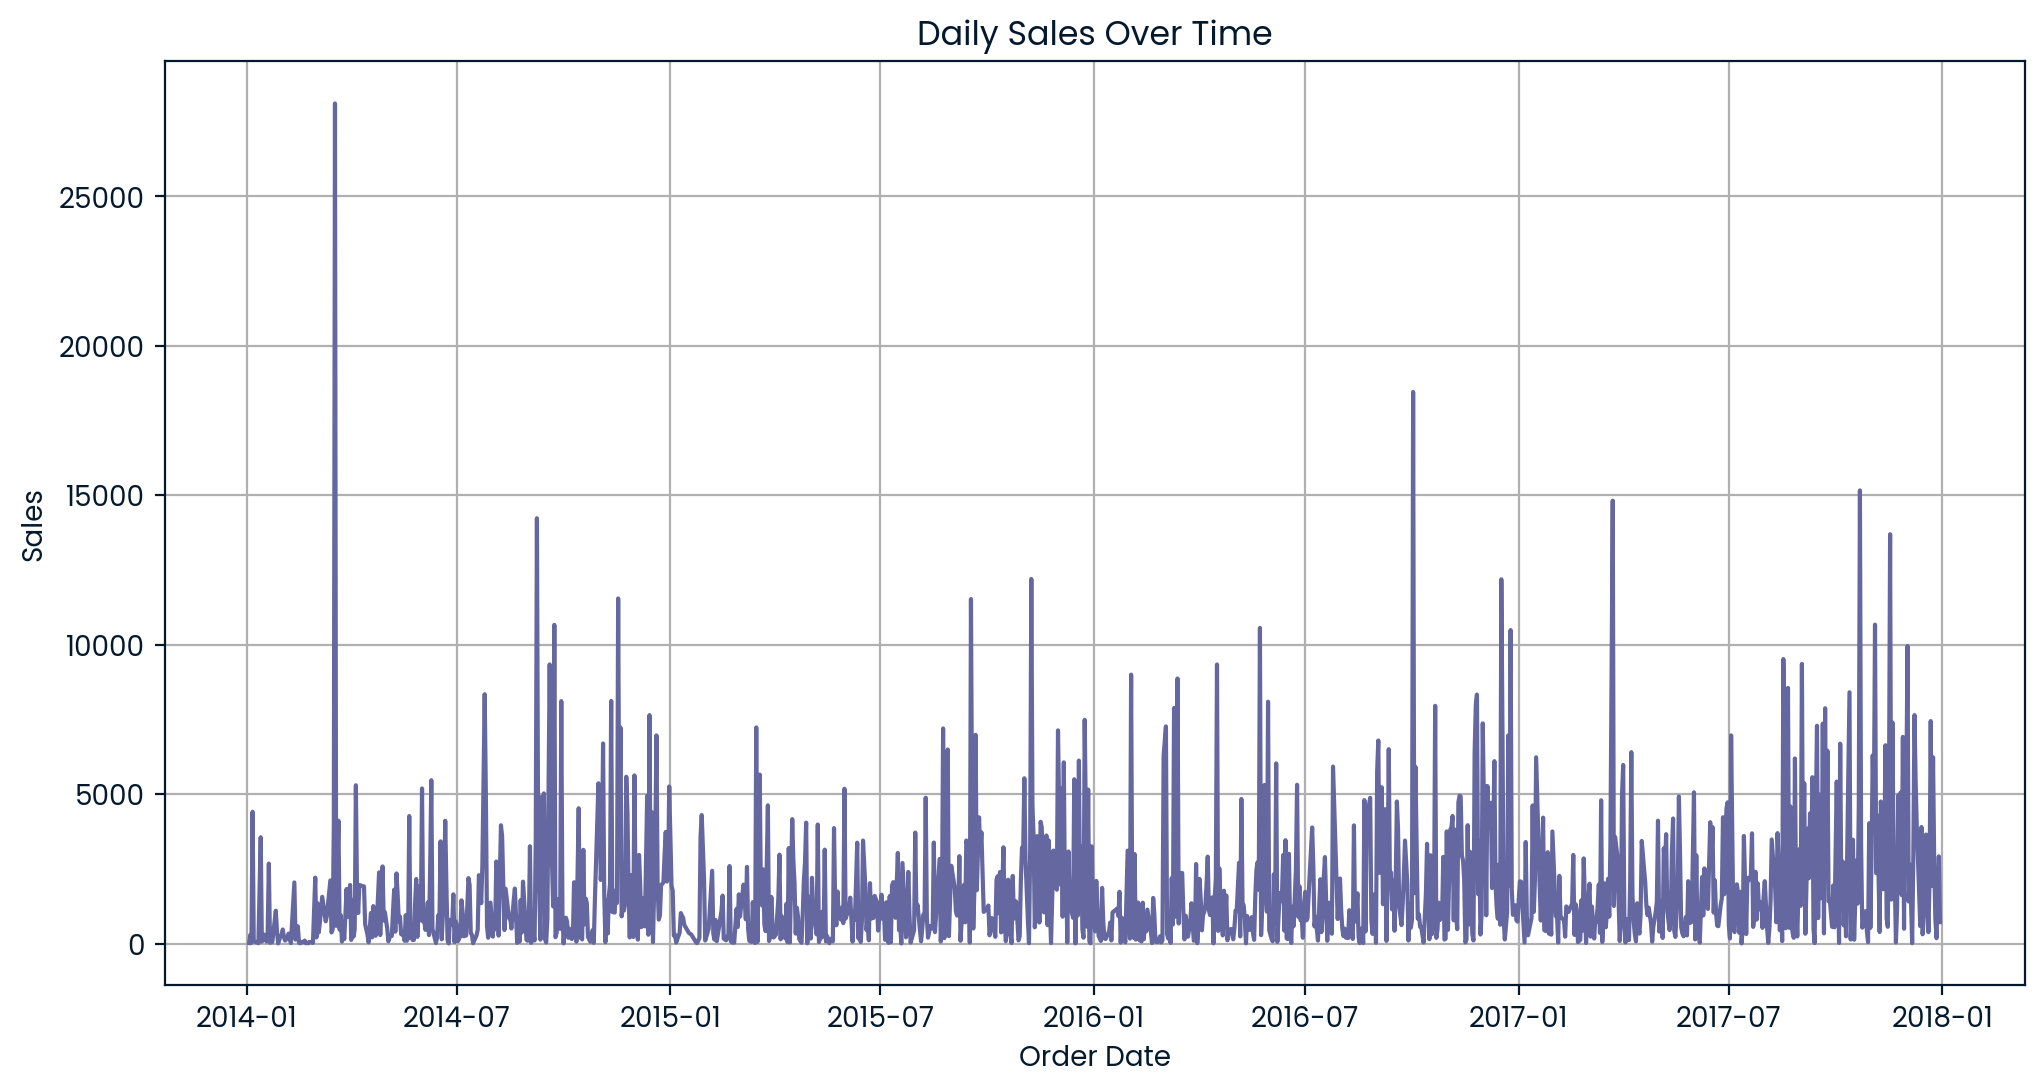

In [122]:
import matplotlib.pyplot as plt

# Plotting daily sales
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Order Date'], daily_sales['Sales'], linestyle='-')
plt.title('Daily Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# Year 201x

In [131]:
CURRENT_YEAR = 2015
daily_sales_201x = daily_sales[daily_sales['Order Date'].dt.year == CURRENT_YEAR]
daily_sales_201x.head()

,Order Date,Sales
305,2015-01-02,1932.0960
306,2015-01-03,1768.2216
307,2015-01-04,264.4600
308,2015-01-05,295.2720
309,2015-01-06,31.5380


In [132]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Calculate the Z-scores of the sales data
daily_sales_201x['Z_score'] = (daily_sales_201x['Sales'] - daily_sales_201x['Sales'].mean()) / daily_sales_201x['Sales'].std()

# Define a threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = daily_sales_201x[np.abs(daily_sales_201x['Z_score']) > threshold]

# Get the dates of the outliers
outlier_dates = outliers.index

# Get the subdataframe from superstore_data for the outlier dates
outlier_subdataframe = superstore_data[superstore_data['Order Date'].isin(outlier_dates)]

# Visualization of outliers using Plotly
fig = go.Figure()

# Add the sales data
fig.add_trace(go.Scatter(x=daily_sales_201x.index, y=daily_sales_201x['Sales'], mode='lines', name='Sales'))

# Add the outliers
fig.add_trace(go.Scatter(x=outliers.index, y=outliers['Sales'], mode='markers', name='Outliers', marker=dict(color='red')))

# Update layout
fig.update_layout(
    title='Daily Sales with Outliers',
    xaxis_title='Order Date',
    yaxis_title='Sales',
    legend_title='Legend'
)

fig.show()

# Display the outlier subdataframe
outlier_subdataframe

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [133]:
# Filter the superstore_data for the CURRENT_YEAR
superstore_data_201x = superstore_data[superstore_data['Order Date'].dt.year == CURRENT_YEAR]
customer_sales = superstore_data_201x.groupby('Customer Name')['Sales'].sum()

# Get the top 5 highest spending customers
top_5_highest_spending_customers = customer_sales.nlargest(5)
top_5_highest_spending_customers

Customer Name
Peter Fuller            9022.324
Keith Dawkins           7039.044
Christopher Martinez    6682.260
Fred Hopkins            6056.090
Natalie Webber          5511.316
Name: Sales, dtype: float64

In [134]:
# Filter the superstore_data for the CURRENT_YEAR
superstore_data_201x = superstore_data[superstore_data['Order Date'].dt.year == CURRENT_YEAR]
subcategory_sales = superstore_data_201x.groupby('Sub-Category')['Sales'].sum()

# Get the top 5 highest sales subcategories
top_5_highest_sales_subcategories = subcategory_sales.nlargest(5)
top_5_highest_sales_subcategories

Sub-Category
Chairs         71734.5290
Phones         68313.7020
Storage        45048.2480
Accessories    40523.9600
Tables         39150.4235
Name: Sales, dtype: float64

# Prices (for reference only)

In [135]:
price_range = superstore_data.groupby(['Category', 'Sub-Category'])['Sales'].agg(['min', 'max']).reset_index()
price_range.columns = ['Category', 'Sub-Category', 'Min Price', 'Max Price']

# Display the price range dataframe
price_range

,Category,Sub-Category,Min Price,Max Price
0,Furniture,Bookcases,35.490,4404.900
1,Furniture,Chairs,26.640,4416.174
2,Furniture,Furnishings,1.892,1336.440
3,Furniture,Tables,24.368,4297.644
4,Office Supplies,Appliances,0.444,2625.120
5,Office Supplies,Art,1.344,1113.024
6,Office Supplies,Binders,0.556,9892.740
7,Office Supplies,Envelopes,1.632,604.656
8,Office Supplies,Fasteners,1.240,93.360
9,Office Supplies,Labels,2.088,786.480


In [136]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

superstore_data_curr = superstore_data[superstore_data['Order Date'].dt.year == CURRENT_YEAR]

# Plot histogram of price distribution for each subcategory
subcategories = superstore_data_curr['Sub-Category'].unique()

# Create a subplot with one row per subcategory
fig = make_subplots(rows=len(subcategories), cols=1, subplot_titles=subcategories)

for i, subcategory in enumerate(subcategories):
    subcategory_data = superstore_data_curr[superstore_data_curr['Sub-Category'] == subcategory]
    hist = go.Histogram(x=subcategory_data['Sales'], nbinsx=20, name=subcategory)
    fig.add_trace(hist, row=i+1, col=1)

# Update layout
fig.update_layout(height=400*len(subcategories), width=800, title_text=f"Price Distribution for Each Sub-Category ({CURRENT_YEAR})")
fig.update_xaxes(title_text="Sales")
fig.update_yaxes(title_text="Frequency")

fig.show()